# 대표적인 연속형 확률분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate 
from scipy.optimize import minimize_scalar

#%precision 10
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

- 정규분포(normal distribution)
    - 대표본 모집단의 합, 평균 추론 시 활용
- t-분포
    - 소표본 모집단 평균 추론 시 활용
    - 선형모형 회귀계수 추론(종속변수 정규분포 가정)시 활용
- 카이제곱(χ2)분포
    - 모집단 분산 추론 시(데이터 정규분포 가정) 활용
    - 카이제곱 검정 시 활용
- F-분포
    - 두 모집단 분산 차이 비교 시 활용(데이터 정규분포 가정)
    - 분산분석 시 활용
    - (설명하는 변동/설명하지 못하는 변동)이 F분포를 따름

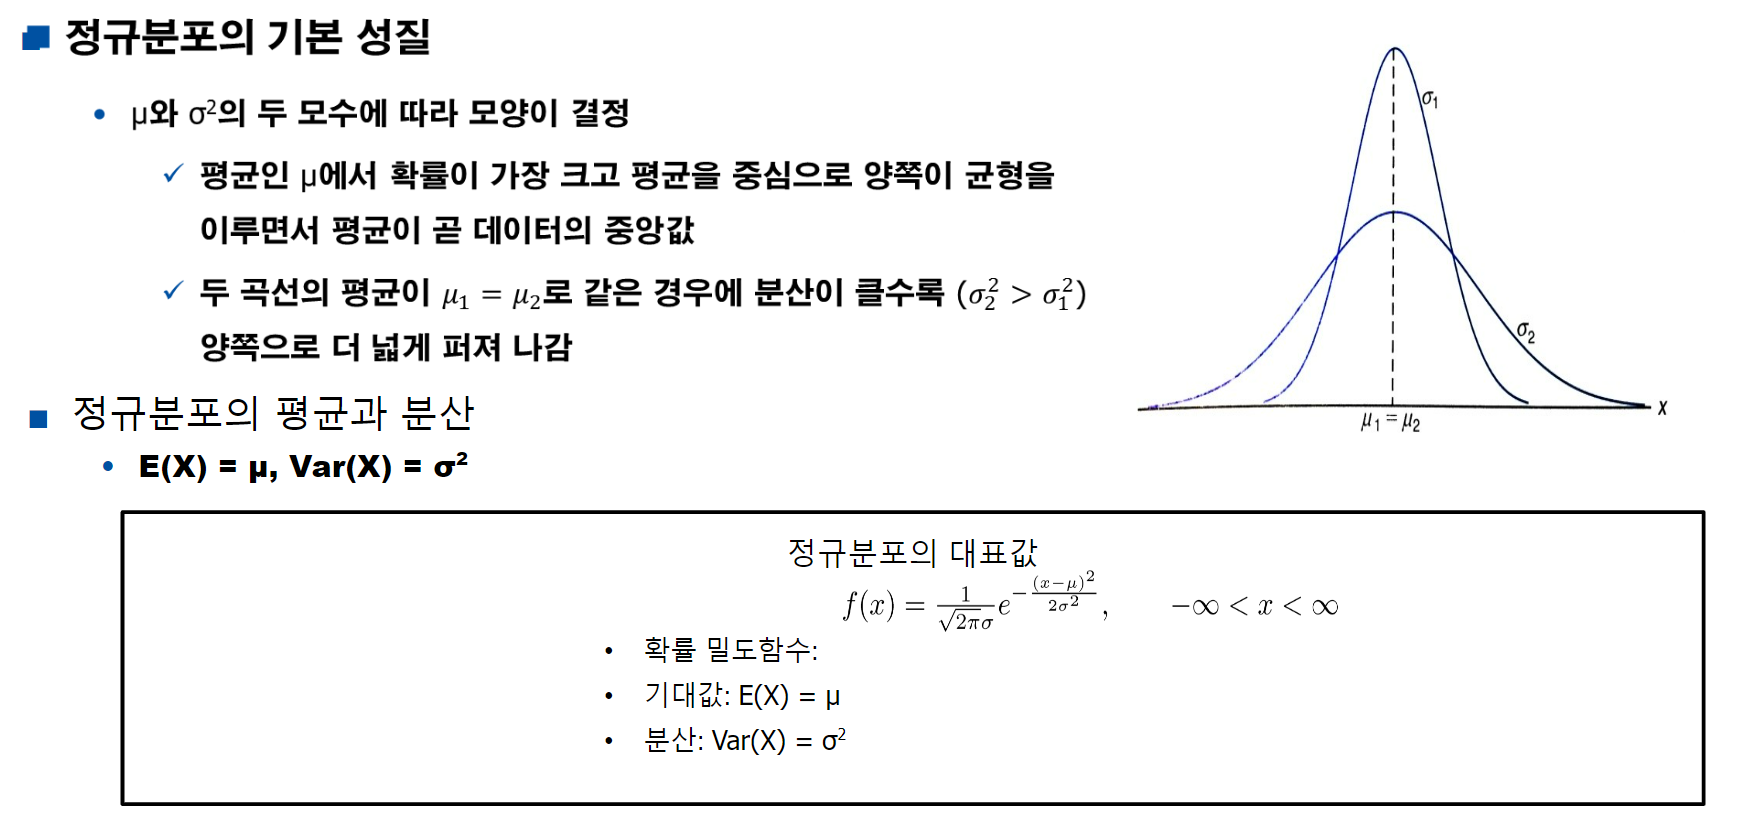

#### 정규분포 norm
- 1 확률밀도함수 : norm.pdf
- 2 누적분포함수 : norm.cdf
- 3 백분율 포일트 함수 : norm.ppf
- 4 랜덤 변수 생성 함수 : norm.rvs

- 1 : pdf(x, 평균, 표준편차) -> x값이 발생할 확률 , 표준과 표준편차를 생략하면 정규분포의 확률밀도 함수가 된다
- 2 : cdf(x, 평균, 표준편차) -> x이하의 값이 발생할 확률 , 표준과 표준편차를 생략하면 정규분포의 누적분포 함수가 된다
- 3 : ppf(q, 평균, 표준편차) -> 누적분포함수의 역함수,누적분포의 값이 q 범위일 경우 x의 값을 리턴 , 표준과 표준편차를 생략하면 정규분포의 백분율 포인트 함수가 된다 
- 4 : rvs(평균, 표준편차, 생성되는 임의변수의 수, random_state=None) -> 정규분포에 따라서 발생한 랜덤 변수 , 표준과 표준편차를 생략하면 정규분포의 랜덤 변수생성 함수가 된다 


In [3]:
from scipy.stats import norm  #정규분포 모듈

In [4]:
#1) 확률밀도함수를 확인해보자
norm.pdf(0) #0이 발생할 확률은 39.9%이다 -> 시각화 구간을 -4~4에서 100개를 근사값으로 해야지

0.3989422804014327

In [5]:
#2) y_pdf를 만들자 norm.pdf(x)
x=np.linspace(-4,4,100)
y_pdf = norm.pdf(x)

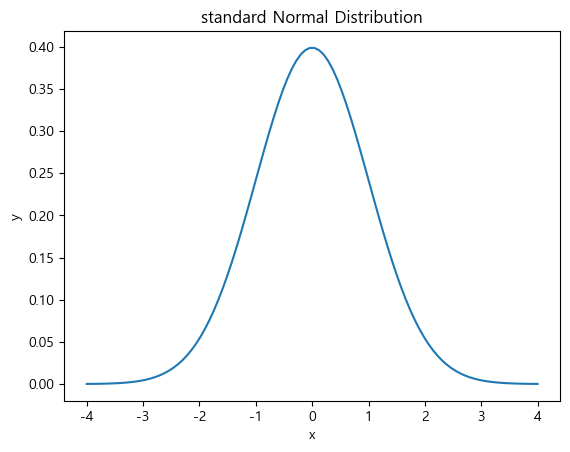

In [6]:
#3) 
plt.plot(x,y_pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('standard Normal Distribution')
plt.show()

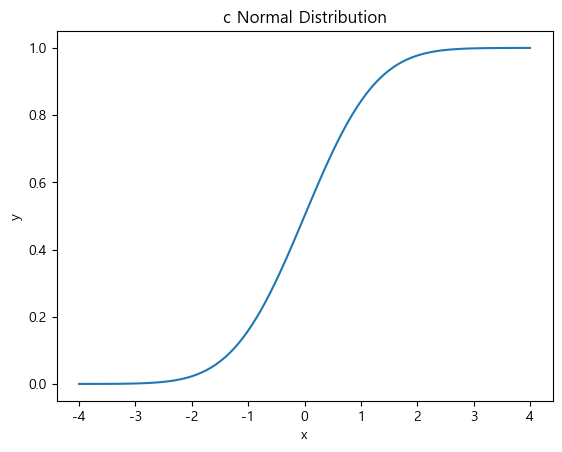

In [7]:
#4) CDF를 이용한 누적 분포 그래프를 그려보자.
y_cdf = norm.cdf(x)
plt.plot(x,y_cdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('c Normal Distribution')
plt.show()

In [8]:
#5) x값이 그 이하의 값이 발생될 홧률은 몇 %인가?
norm.cdf(0) #확률밀도함수가 평균이 0을 중심으로 죄우대칭 되기때문에 확률은 50%가 된다

0.5

In [9]:
#6) 확률밀도함수가 평균이 0을 중심으로 죄우대칭 되기때문에 확률은 50%가 된다는 것 확인
# x= -4일 경우는 ?
norm.cdf(-4)   # e-05

3.167124183311986e-05

In [12]:
#7) x가 4이상일 확률은?
1-norm.cdf(4)

3.167124183311998e-05

In [15]:
#8) 백분율 포인트 함수
p=np.linspace(0,1,100)
y_ppf=norm.ppf(p)

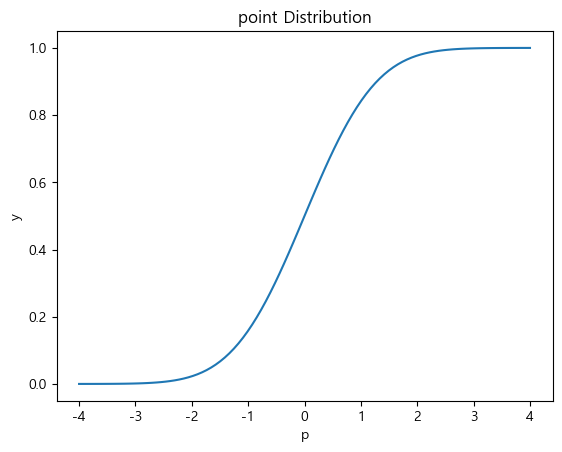

In [17]:
plt.plot(x,y_cdf)
plt.xlabel('p')
plt.ylabel('y')
plt.title('point Distribution')
plt.show()

In [18]:
#9) 백분율 포인트 함수를 사용하여 누적 분포 함수의 값이 p이다. x값을 계산해보자. p=0.5일 경우 x?
norm.ppf(0.5)

0.0

In [20]:
#10) 백분율 포인트 함수를 사용하여 누적 분포 함수의 값이 p이다. x값을 계산해보자. p=0.025일 경우 x?
norm.ppf(0.025)

-1.9599639845400545

In [21]:
#11) 백분율 포인트 함수를 사용하여 누적 분포 함수의 값이 p이다. x값을 계산해보자. p=0.741일 경우 x?
norm.ppf(0.741)

0.6464314163244075

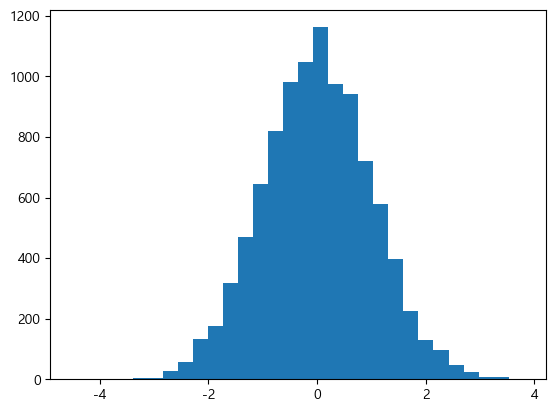

In [23]:
#12) 랜덤 변수 생성 함수 1000개의 랜덤 변수를 생성하자
y_rvs = norm.rvs(size=10000)
plt.hist(y_rvs,bins=30)
plt.show()

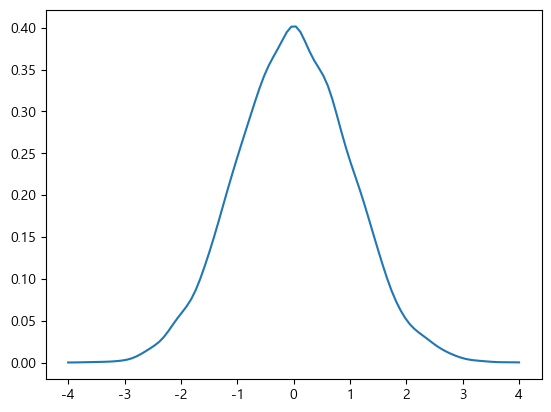

In [24]:
#13) y_rvs 표준 정규 분포에서 생성되었지만 y_rvs 어떤 분포 함수에서 생성되었는지알 수 없다
# y_rvs원래 확률 밀도 함함수를 추정할 경우 커널 밀도 추정함수(kde)인 gaussian_kde를 사용한다
from scipy.stats import gaussian_kde
kde = gaussian_kde(y_rvs)
plt.plot(x,kde(x))
plt.show()

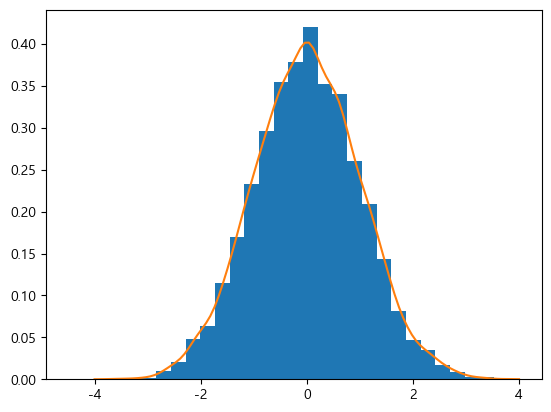

In [25]:
plt.hist(y_rvs,bins=30,density=True)
plt.plot(x,kde(x))
plt.show()

### t 분포

t분포는 모듈 이름은 t.  df = degrees of freedom로 분포의 매개변수를 갖는다
t.pdf(x,df) : df가 높을수록 t분포는 정규 분포에 가깝다
t.cdf(x,df)
t.ppf(x,df)
t.rvs(df , size =1)

- 자유도는 일반적으로 분석에서 변할 수 있는 독립적인 값이나 양을 나타낸다, t분포의 맥락에서 보통 df = 표본크기 -1
- t분포는 표본 크기가 작거나 모집단의 표준 편차 대신 사용한다.

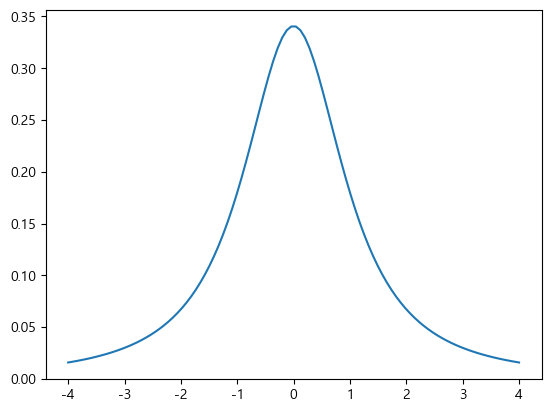

In [29]:
# t-test : t분포의 적용 중 두 그룹의 평균 또는 표본 평균과 알려진 값 사이의 통계적 유의미한 판단
# 단일 표본 t-검정 , 독립2-표본t-검정 , 쌍체 t- 검정
from scipy.stats import t
x= np.linspace(-4,4,100)
y= t.pdf(x,df=1.5)
plt.plot(x,y)
plt.show()

In [33]:
#16)df=1의 경우 x-3 확률은 
t.cdf(-3,df=1)

0.10241638234956672

In [35]:
#16)df=1의 경우 x=3 확률은
t.cdf(3,df=1)

0.8975836176504333

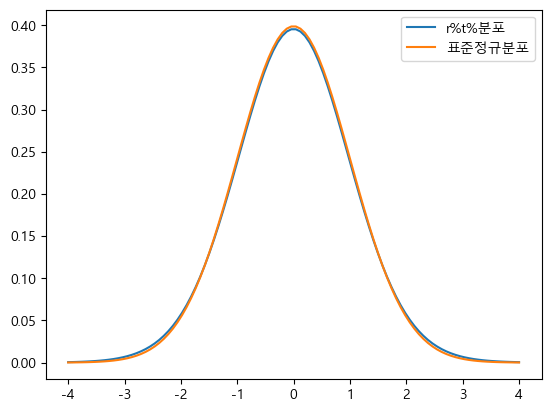

In [36]:
#18) 분포와 표준 정규 분포는 정규 분포가 매우 유사하다
#자유도가 30되면 두 분포의 오차는 메우 작아지는 것을 확인할수 있다
plt.plot(x,t.pdf(x,30),label = 'r%t%분포')
plt.plot(x,norm.pdf(x),label = '표준정규분포')
plt.legend()
plt.show()

### 카이제곱 분포

chi2.pdf(x,df) :
chi2.cdf(x,df) :
chi2.ppf(a,df) :
chi2.rvs(df,size=1) :

카이제곱 분포를 하는 이유?
- 적합도 테스트 : 빈도 또는 범주형 데이터 셋이 특정 이론적 분포와 일치하는지 확인
- 분할표의 독립 테스트 : 분할표(교차)를 분석할 때 사용,두 범주형 변수 사이에 유의미한 관계성 확인
     - ex) 성별과 특정 제품에 대한 선호도 사이에 관계가 있는지 테스트
- 변형 테스트 : 추론 통계에서 카이제곱 분포는 표본의 관측 분산이 예상 분산과 크게 다르지 유무확인(기본 모집단에 대한 정규 분포를 가정)
- 분산 및 표준편차에 대한 신뢰구간 : 모집단 평균을 알수없는 경우
- 균질성 테스트 : 독립성 검정과 유사하지만 다양한 모집단에 걸치 범주형 변수의 분포를 비교
     - ex) 연령대 분포가 여러지역에서 유사한지 확인

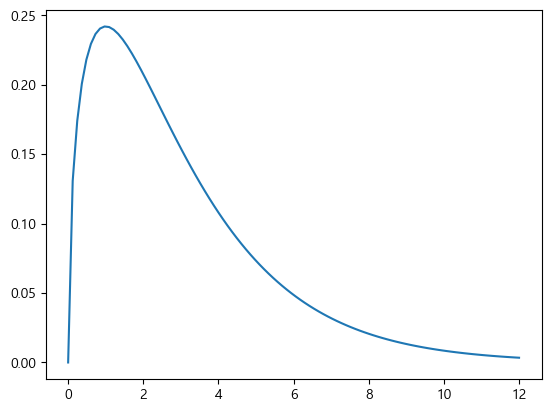

In [39]:
from scipy.stats import chi2
x = np.linspace(0,12,100)
y= chi2.pdf(x,df=3)
plt.plot(x,y)

In [40]:
#20)df=3의 경우 x=1 확률은 
chi2.cdf(1,df=3)

0.19874804309879915

In [41]:
#21)df=3의 경우 x=10확률은 
chi2.cdf(10,df=3) ,(1-chi2.cdf(10,df=3)) 

(0.9814338645369568, 0.0185661354630432)

### F분포

F 분포 dfn : 분자의 자유도(numerator degree of freedom) , dfd:분모 자유도(denominator degree of freedom)  
f.pdf(x,dfn,dfd)  
f.cdf(x,dfn,dfd)  
f.ppf(x,dfn,dfd)  
f.rvs(a,dfn,dfd)

F 분포을 하는 이유 ? Fisher-Snedecor, ANOVA의 F-통계량 계산의 핵심, 가설 검정 및 분산 분석

- ANOVA(분산 분석): 세 개 이상의 그룹의 평균을 비교하여 적어도 하나의 그룹 평균이 다른 그룹 평균과 통계적으로 다른지 확인하는 데 사용
  
- 분산에 대한 가설 검정: 모집단이 정규 분포를 따른다는 가정 하에 두 모집단의 분산을 비교하는 검정에 사용
    - 등분산에 대한 F-검정으로 두 개의 서로 다른 샘플에 유사한 분산이 있는지 확인하려는 경우에 유용
    
- 회귀 분석: 다중회귀분석에서는 모델의 전반적인 유의성을 검정하기 위해 F-분포를 사용
    - 예측 변수가 없는 모델(절편만 있음)을 예측 변수가 있는 지정된 모델과 비교하여 추가된 예측 변수가 모델을 크게 향상시키는지 확인

- 품질 관리: 다양한 생산 프로세스 또는 배치의 차이를 비교하여 제품 품질의 일관성을 보장등에 사용

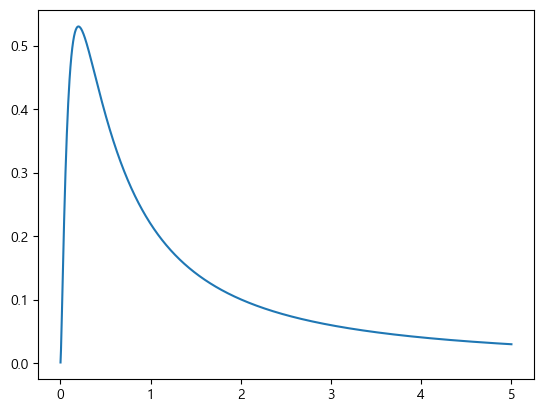

In [42]:
from scipy.stats import f
x=np.linspace(0.001,5,1000)
y= f.pdf(x,dfn=5,dfd=1)
plt.plot(x,y)

In [45]:
f.pdf(0.1,dfn=5,dfd=1) , (1-f.pdf(0.1,dfn=5,dfd=1))

(0.44460064995412646, 0.5553993500458736)

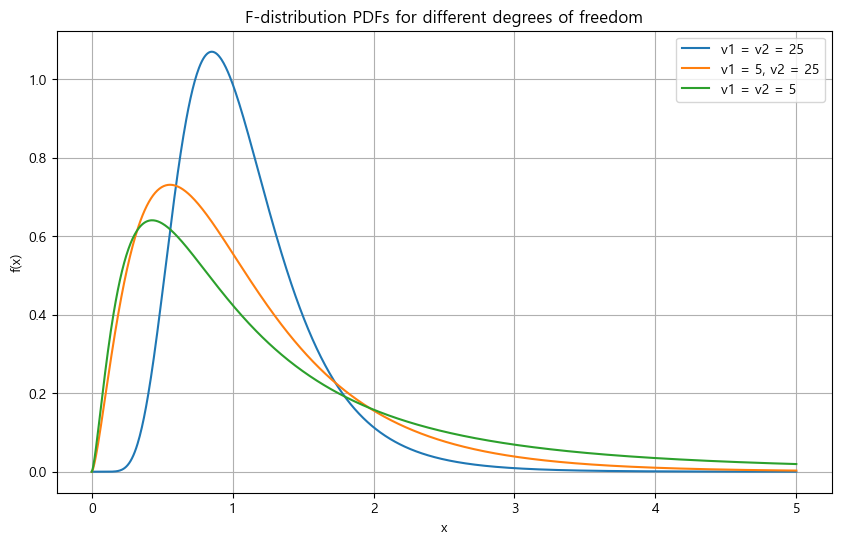

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f


dfn_v1_v2_25 = 25
dfd_v1_5_v2_25 = 25
dfn_v1_v2_5 = 5
dfd_v1_v2_5 = 5


x = np.linspace(0, 5, 1000)

pdf_v1_v2_25 = f.pdf(x, dfn_v1_v2_25, dfn_v1_v2_25)
pdf_v1_5_v2_25 = f.pdf(x, dfn_v1_v2_5, dfd_v1_5_v2_25)
pdf_v1_v2_5 = f.pdf(x, dfn_v1_v2_5, dfd_v1_v2_5)

plt.figure(figsize=(10, 6))

plt.plot(x, pdf_v1_v2_25, label='v1 = v2 = 25')
plt.plot(x, pdf_v1_5_v2_25, label='v1 = 5, v2 = 25')
plt.plot(x, pdf_v1_v2_5, label='v1 = v2 = 5')

plt.title('F-distribution PDFs for different degrees of freedom')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Uniform Distribution 균일분포  
- uniform.pdf(x, loc=0, scale=1)  
- uniform.cdf(x, loc=0, scale=1)  
- uniform.ppf(x, loc=0, scale=1)  
- uniform.rvs(loc=0, scale=1, size=1)  = logistic.pdf(z),z=(x-loc)/scale

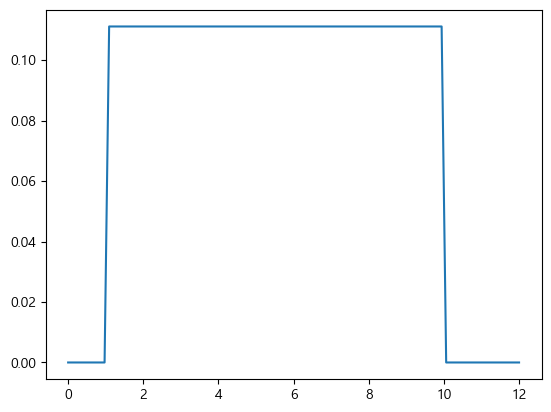

In [47]:
from scipy.stats import uniform
x= np.linspace(0,12,100)
y= uniform.pdf(x,loc=1,scale=9)
plt.plot(x,y)